
# Finance Data project

In this project I am going to analyze the data and do data visulization of the stock prices.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [7]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.210  40.429  39.550  40.347  19015870.0  414.23  417.42   
2006-01-04   40.279  40.487  39.806  39.918  20721009.0  413.07  415.08   
2006-01-05   39.918  40.134  39.697  39.971  17296502.0  409.48  412.36   
2006-01-06   40.106  40.200  39.723  39.909  14696272.0  413.22  413.36   
2006-01-09   40.038  40.253  39.730  39.936  18225560.0  410.84  412.02   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   406.69  416.68  1818904.0  ...  38.216  39.095  37.923  38.973   
2006-01-04   408.71  408.98  2213232.0  ...  39.239  39.627  39.005  39.005   
2006-01-05   409.15  410.99  1342956.0  ...  39.005  39.167  38.778  39.111   
2006-01-06   407.46  410.99  1620886.0  ...  39.286  39.336  38.804  39.151   
2006-01-09   408.29  409.06  1988231.0  ...  39.188  39.634  39.182  39.560   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6677697.0  23.047  23.322  22.756  23.265  15105328.0  
2006-01-04   9907631.0  23.189  23.204  22.870  22.995  14904591.0  
2006-01-05   7175703.0  22.972  23.009  22.832  22.972  13891570.0  
2006-01-06   8556441.0  23.034  23.170  22.894  23.103  11523015.0  
2006-01-09   5147052.0  23.103  23.204  23.009  23.103   7705415.0  

[5 rows x 30 columns]

# Exploring the data

In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.047
C      476.870
GS     207.840
JPM     58.185
MS      59.691
WFC     47.722
dtype: float64

In [13]:
returns = pd.DataFrame()

In [14]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018479,-0.013699,-0.014308,0.000821,-0.011605
2006-01-05,0.001328,0.004915,-0.000375,0.003130,0.002718,-0.001000
2006-01-06,-0.001551,0.000000,0.013988,0.007064,0.001023,0.005703
2006-01-09,0.000677,-0.004696,0.012036,0.016241,0.010447,0.000000


# Vizualizing the data

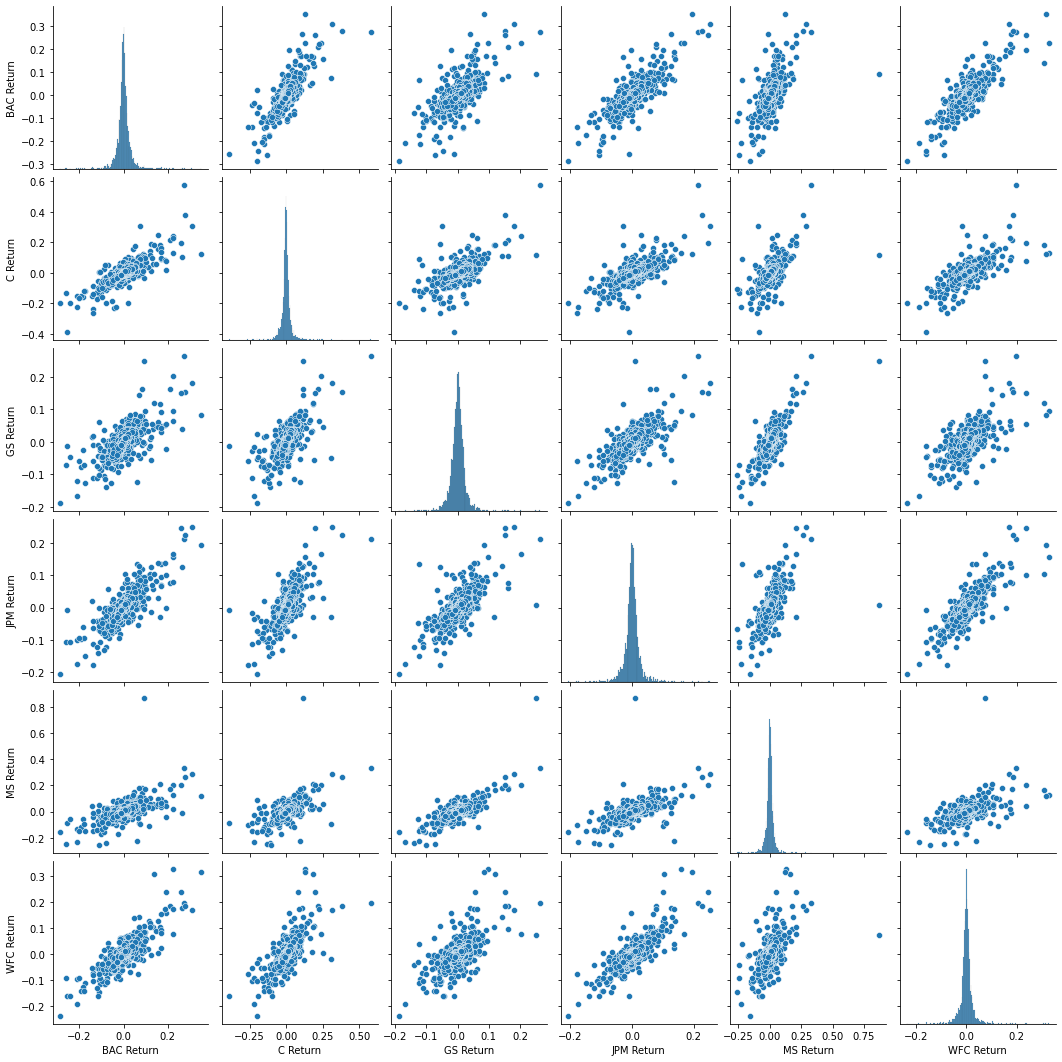

In [15]:
import seaborn as sns
sns.pairplot(returns[1:])

In [16]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [18]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [21]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016148
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016007
WFC Return    0.012545
dtype: float64

C:\Users\Asus\anaconda3\envs\tensor_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

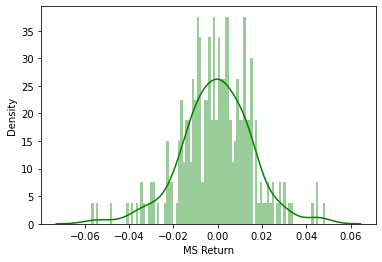

In [22]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

C:\Users\Asus\anaconda3\envs\tensor_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

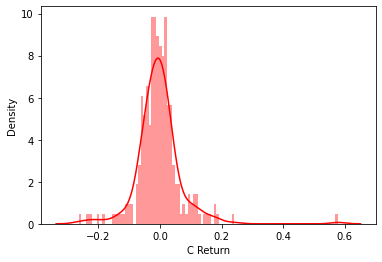

In [23]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

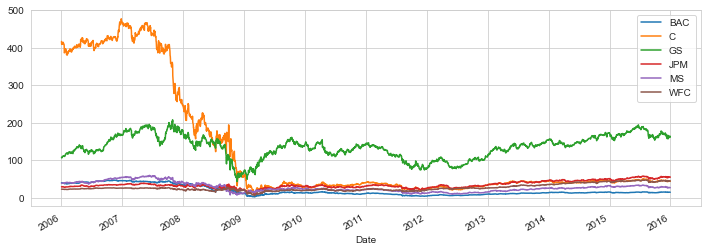

In [26]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

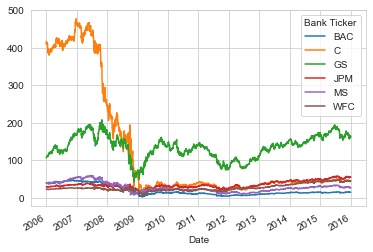

In [27]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [28]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17396\2494955124.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Asus\AppData\Local\Temp\ipykernel_17396\2494955124.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



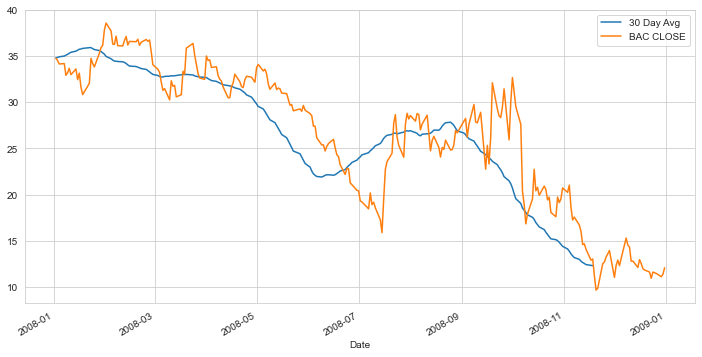

In [30]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

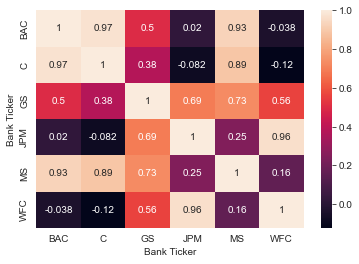

In [31]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

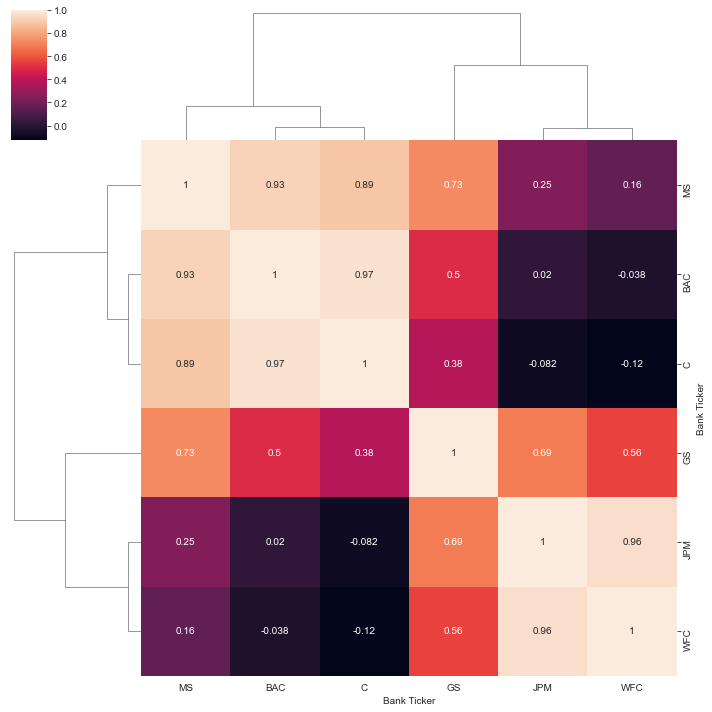

In [32]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [33]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [34]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

C:\Users\Asus\AppData\Local\Temp\ipykernel_17396\2467045757.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [35]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\Asus\AppData\Local\Temp\ipykernel_17396\3850420300.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

